## LLM deviner les etiquettes 

### 1. Importation et nettoyage des données 

1.1 Importation et construction de la datframe de travail 

In [250]:
import pandas as pd
import numpy as np

In [251]:
#IMPORTATION DES DONNÉES
df_logement = pd.read_csv('df_logement.csv', sep=';')

In [252]:
df_logement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152272 entries, 0 to 1152271
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   conso_5_usages_ef                  1152272 non-null  float64
 1   conso_5_usages_ef_energie_n1       1152272 non-null  float64
 2   code_departement_ban               1151232 non-null  float64
 3   adresse_brut                       1152252 non-null  object 
 4   code_region_ban                    1151232 non-null  float64
 5   cout_total_5_usages                1152272 non-null  float64
 6   hauteur_sous_plafond               1152272 non-null  float64
 7   nom_commune_ban                    1152272 non-null  object 
 8   coordonnee_cartographique_x_ban    1152272 non-null  float64
 9   qualite_isolation_murs             1152272 non-null  object 
 10  type_batiment                      1152272 non-null  object 
 11  type_energie_principale_

In [253]:
df_logement.columns.tolist()

['conso_5_usages_ef',
 'conso_5_usages_ef_energie_n1',
 'code_departement_ban',
 'adresse_brut',
 'code_region_ban',
 'cout_total_5_usages',
 'hauteur_sous_plafond',
 'nom_commune_ban',
 'coordonnee_cartographique_x_ban',
 'qualite_isolation_murs',
 'type_batiment',
 'type_energie_principale_chauffage',
 'date_reception_dpe',
 'cout_total_5_usages_energie_n1',
 'adresse_ban',
 'coordonnee_cartographique_y_ban',
 'type_energie_n1',
 'code_postal_ban',
 'surface_habitable_logement',
 'etiquette_dpe',
 '_score',
 'code_postal_source',
 'annee_recherche',
 'date_extraction',
 'nom_rue_ban',
 'nombre_appartement',
 'logement',
 'latitude',
 'longitude']

-  Variable à prédire (Cible) (Y) -> etiquette_dpe (object)
-  Variables prédictives (X)      -> 'conso_5_usages_ef', 'conso_5_usages_ef_energie_n1', 'cout_total_5_usages', 'hauteur_sous_plafond','qualite_isolation_murs', 'type_batiment', 'type_energie_principale_chauffage', 'cout_total_5_usages_energie_n1', 'type_energie_n1', 'surface_habitable_logement', 'logement', 'nombre_appartement'

In [254]:
Variable_Etiquette = ['conso_5_usages_ef',
 'conso_5_usages_ef_energie_n1',
 'cout_total_5_usages',
 'hauteur_sous_plafond',
 'qualite_isolation_murs',
 'type_batiment',
 'type_energie_principale_chauffage',
 'cout_total_5_usages_energie_n1',
 'type_energie_n1',
 'surface_habitable_logement',
 'etiquette_dpe',
 'nombre_appartement',
 'logement']

In [255]:
df_Variables = df_logement[Variable_Etiquette]

In [256]:
df_Variables.head()

,conso_5_usages_ef,conso_5_usages_ef_energie_n1,cout_total_5_usages,hauteur_sous_plafond,qualite_isolation_murs,type_batiment,type_energie_principale_chauffage,cout_total_5_usages_energie_n1,type_energie_n1,surface_habitable_logement,etiquette_dpe,nombre_appartement,logement
0,9791.0,9791.0,1635.0,2.3,bonne,appartement,Électricité,1635.0,Électricité,60.0,F,NaN,ancien
1,8579.9,8579.9,1445.0,2.3,bonne,appartement,Électricité,1445.0,Électricité,60.0,E,NaN,ancien
2,9791.0,9791.0,1635.0,2.3,bonne,appartement,Électricité,1635.0,Électricité,60.0,F,NaN,ancien
3,8579.9,8579.9,1445.0,2.3,bonne,appartement,Électricité,1445.0,Électricité,60.0,E,NaN,ancien
4,14970.6,14075.2,2273.2,2.5,bonne,appartement,Gaz (GPL/Propane/Butane),2013.5,GPL,69.5,E,1.0,ancien


In [257]:
df_Variables.shape

(1152272, 13)

1.2 Valeur Manquantes

In [258]:
#Valeur manquante dans chaque colonne (en pourcentage) (si 0 ne pas afficher) (vm = valeur manquante)
vm_percentage = df_Variables.isnull().mean() * 100
vm_percentage = vm_percentage[vm_percentage > 0]
print(vm_percentage)

nombre_appartement    6.370024
dtype: float64


In [259]:
df_Variables['nombre_appartement']

0          NaN
1          NaN
2          NaN
3          NaN
4          1.0
          ... 
1152267    NaN
1152268    1.0
1152269    1.0
1152270    1.0
1152271    NaN
Name: nombre_appartement, Length: 1152272, dtype: float64

In [260]:
# Hypothèse numéro 1 : Type de logement 
df_Variables['type_batiment']

missing_surface = df_Variables[
    (df_Variables['type_batiment'] == 'maison') &
    (df_Variables['nombre_appartement'].isnull())
]
print(missing_surface.shape[0])

#Alors metre 1 (car maison )


4256


In [261]:
df_Variables.loc[
    (df_Variables['type_batiment'] == 'maison') &
    (df_Variables['nombre_appartement'].isnull()),
    'nombre_appartement'
] = 1.0

In [262]:
df_Variables['nombre_appartement'].isnull().sum()

np.int64(69144)

In [263]:
df_Variables = df_Variables.dropna(subset=['nombre_appartement'])

In [264]:
df_Variables['nombre_appartement'].describe()

count    1.083128e+06
mean     2.484915e+01
std      4.563905e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+01
max      5.000000e+03
Name: nombre_appartement, dtype: float64

In [265]:
seuil_99 = df_Variables['nombre_appartement'].quantile(0.99)

In [266]:
df_Variables['nombre_appartement'] = np.clip(
    df_Variables['nombre_appartement'],
    a_min=None,
    a_max=seuil_99
)

In [267]:
bins = [1, 4, 10, 31, np.inf]
labels = [
    'Maison(Unitaire ou 2 à 3 logements)', 
    'Petit Collectif(4 à 9 logements)', 
    'Moyen Collectif(10 à 30 logements)', 
    'Grand Collectif(> 30 logements)'
]

# Application de la discrétisation
df_Variables['nombre_appartement_cat'] = pd.cut(
    df_Variables['nombre_appartement'],
    bins=bins,
    labels=labels,
    right=False,        # La borne supérieure est exclusive (e.g., [1, 2) contient 1)
    include_lowest=True # Inclut la borne la plus basse (1)
).astype('category')

In [268]:
df_Variables['nombre_appartement_cat'].value_counts()

nombre_appartement_cat
Maison(Unitaire ou 2 à 3 logements)    557832
Grand Collectif(> 30 logements)        266684
Moyen Collectif(10 à 30 logements)     224428
Petit Collectif(4 à 9 logements)        34184
Name: count, dtype: int64

In [269]:
df_Variables = df_Variables.drop(columns=['nombre_appartement'])

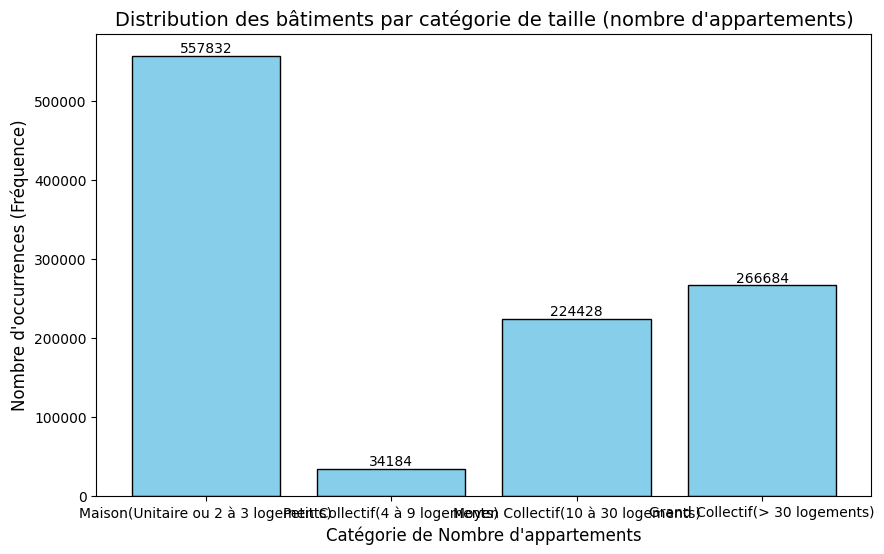

In [270]:
import matplotlib.pyplot as plt


counts = df_Variables['nombre_appartement_cat'].value_counts()
counts = counts.sort_index()
categories = counts.index.to_list()
values = counts.values.tolist()


plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue', edgecolor='black')
plt.title("Distribution des bâtiments par catégorie de taille (nombre d'appartements)", fontsize=14)
plt.xlabel("Catégorie de Nombre d'appartements", fontsize=12)
plt.ylabel("Nombre d'occurrences (Fréquence)", fontsize=12)
for i, v in enumerate(values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.show()

1.3 Variable qualitative 

In [271]:
qualitatives = df_Variables.select_dtypes(include=['object', 'category']).columns.tolist() 
qualitatives

['qualite_isolation_murs',
 'type_batiment',
 'type_energie_principale_chauffage',
 'type_energie_n1',
 'etiquette_dpe',
 'logement',
 'nombre_appartement_cat']

In [272]:
#Regroupement des types d'énergie principale de chauffage
energie_regroupement = {'Gaz naturel': 'Gaz naturel',
    'Électricité': 'Électricité',
    'Réseau de Chauffage urbain': 'Réseau de chauffage urbain',
    'Fioul domestique': 'Fioul',
    'Bois – Granulés (pellets) ou briquettes': 'Bois et biomasse',
    'Bois – Bûches': 'Bois et biomasse',
    'Bois – Plaquettes d’industrie': 'Bois et biomasse',
    'Bois – Plaquettes forestières': 'Bois et biomasse',
    'GPL': 'Gaz (GPL/Propane/Butane)',
    'Propane': 'Gaz (GPL/Propane/Butane)',
    'Butane': 'Gaz (GPL/Propane/Butane)',
    'Charbon': 'Charbon',
    'Électricité d\'origine renouvelable utilisée dans le bâtiment': 'Électricité'

}

# Appliquer le mapping
df_Variables['type_energie_n1'] = df_Variables['type_energie_n1'].map(energie_regroupement)

1.3.1 Encodage Ordinal (avec un ordre logique)

In [273]:
df_Variables['qualite_isolation_murs'].value_counts()

qualite_isolation_murs
insuffisante    521100
très bonne      236944
bonne           217604
moyenne         107480
Name: count, dtype: int64

In [274]:
df_Variables['nombre_appartement_cat'].value_counts()

nombre_appartement_cat
Maison(Unitaire ou 2 à 3 logements)    557832
Grand Collectif(> 30 logements)        266684
Moyen Collectif(10 à 30 logements)     224428
Petit Collectif(4 à 9 logements)        34184
Name: count, dtype: int64

In [275]:
from sklearn.preprocessing import OrdinalEncoder

# Définition des ordres pour les variables ordinales
ordres_categories = {
    'qualite_isolation_murs': ['insuffisante', 'moyenne', 'bonne', 'très bonne'],
    'etiquette_dpe': ['G', 'F', 'E', 'D', 'C', 'B', 'A'],
    'nombre_appartement_cat': [
     'Maison(Unitaire ou 2 à 3 logements)',
    'Petit Collectif(4 à 9 logements)',
    'Moyen Collectif(10 à 30 logements)',
    'Grand Collectif(> 30 logements)'
    ]
}

# Application de l'encodage ordinal
variables_ordinales = ['qualite_isolation_murs', 'etiquette_dpe', 'nombre_appartement_cat']

for col in variables_ordinales:
    df_Variables[col] = df_Variables[col].map({val: idx for idx, val in enumerate(ordres_categories[col])})

1.3.2 Encodage pour variables nominales

In [276]:
# Variables nominales 
variables_nominales = [
    'type_batiment', 
    'type_energie_principale_chauffage', 
    'type_energie_n1',
    'logement'
]

# One-Hot Encoding avec pandas
df_Variables = pd.get_dummies(
    df_Variables, 
    columns=variables_nominales, 
    prefix=variables_nominales,
    drop_first=True
)

'qualite_isolation_murs'['très bonne','bonne','moyenne','insuffisante']
 'type_batiment'['appartement', 'immeuble', 'maison']
 'type_energie_principale_chauffage'['Gaz naturel', 'Electricite', 'Réseau de chauffage urbain', 'Bois et biomasse','Fioul','Gaz (GPL/Propane/Butane)','Charbon']
 'type_energie_n1' (enlever)
 'etiquette_dpe'['A','B','C','D','E','F','G']
 'logement'['neuf','ancien']
 'nombre_appartement_cat'['Maison(Unitaire ou 2 à 3 logements) ','Petit Collectif(4 à 9 logements)','Moyen Collectif(10 à 30 logements)','Grand Collectif(> 30 logements)']

In [280]:
df_Variables.head()

,conso_5_usages_ef,conso_5_usages_ef_energie_n1,cout_total_5_usages,hauteur_sous_plafond,qualite_isolation_murs,cout_total_5_usages_energie_n1,surface_habitable_logement,etiquette_dpe,nombre_appartement_cat,type_batiment_immeuble,...,type_energie_principale_chauffage_Gaz naturel,type_energie_principale_chauffage_Réseau de chauffage urbain,type_energie_principale_chauffage_Électricité,type_energie_n1_Charbon,type_energie_n1_Fioul,type_energie_n1_Gaz (GPL/Propane/Butane),type_energie_n1_Gaz naturel,type_energie_n1_Réseau de chauffage urbain,type_energie_n1_Électricité,logement_neuf
4,14970.6,14075.2,2273.2,2.5,2,2013.5,69.5,2,0,False,...,False,False,False,False,False,True,False,False,False,False
5,6301.8,6301.8,1085.6,2.4,2,1085.6,44.0,2,0,False,...,False,False,True,False,False,False,False,False,True,False
6,10841.9,6903.8,885.8,2.2,2,221.0,32.0,0,0,False,...,False,False,False,False,False,False,False,False,False,False
8,6487.3,6487.3,1114.8,2.5,1,1114.8,46.0,2,0,False,...,False,False,True,False,False,False,False,False,True,False
9,10664.5,8652.5,634.6,2.5,3,277.0,56.5,3,0,False,...,False,False,False,False,False,False,False,False,False,False


1.4 Variable Quantitative

In [285]:
Quantitatives = df_Variables.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_exclure = ['qualite_isolation_murs', 'etiquette_dpe', 'nombre_appartement_cat']

variables_quantitatives = [col for col in Quantitatives if col not in variables_exclure]

print("Variables quantitatives pures:")
print(variables_quantitatives)

Variables quantitatives pures:
['conso_5_usages_ef', 'conso_5_usages_ef_energie_n1', 'cout_total_5_usages', 'hauteur_sous_plafond', 'cout_total_5_usages_energie_n1', 'surface_habitable_logement']


Statistiques des variables quantitatives:
       conso_5_usages_ef  conso_5_usages_ef_energie_n1  cout_total_5_usages  \
count       1.083128e+06                  1.083128e+06         1.083128e+06   
mean        1.375531e+04                  1.276275e+04         1.524366e+03   
std         5.542519e+04                  5.169682e+04         5.557607e+03   
min         1.320000e+02                  1.000000e+00         3.830000e+01   
25%         4.367000e+03                  4.062100e+03         5.932000e+02   
50%         7.048450e+03                  6.463200e+03         8.764000e+02   
75%         1.163770e+04                  1.057770e+04         1.257900e+03   
max         4.185980e+06                  3.577992e+06         4.251590e+05   

       hauteur_sous_plafond  cout_total_5_usages_energie_n1  \
count          1.083128e+06                    1.083128e+06   
mean           2.606805e+00                    1.280510e+03   
std            4.225515e+00                    4.509467e+

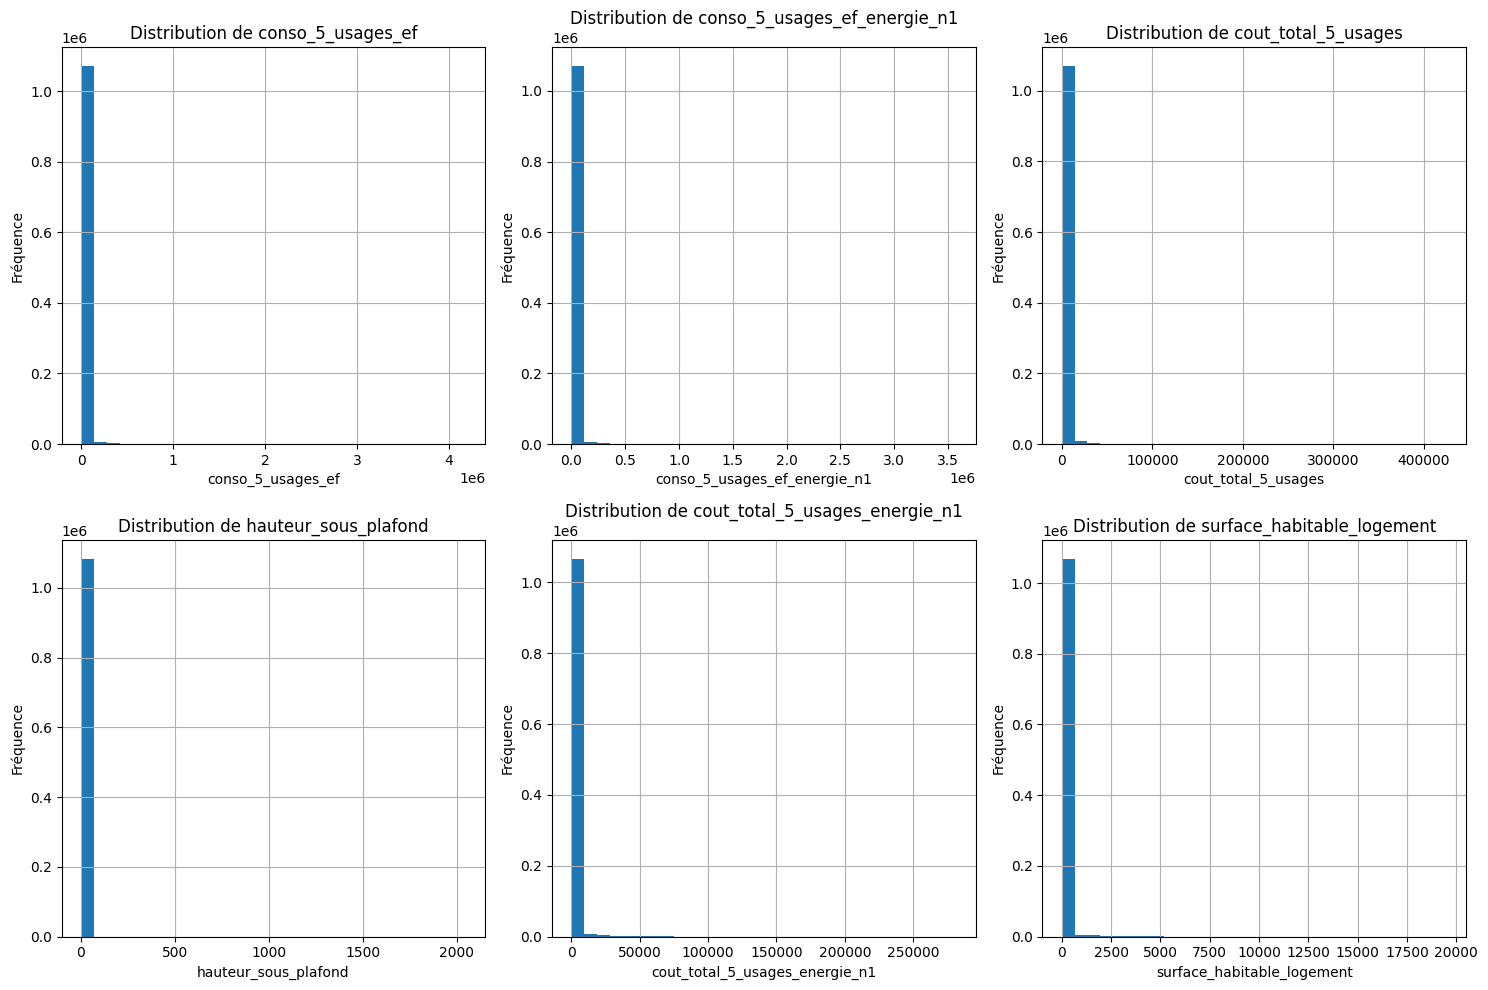

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques descriptives
print("Statistiques des variables quantitatives:")
print(df_Variables[variables_quantitatives].describe())

# Visualisation des distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(variables_quantitatives[:6]):  # Premières 6 variables
    df_Variables[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

In [293]:
#Ce qui pourrais etre reel (enlever les valeurs aberantes)
seuils = {
        'hauteur_sous_plafond': (1.8, 4.0),
        'surface_habitable_logement': (15, 300),
        'conso_5_usages_ef': (500, 50_000),
        'conso_5_usages_ef_energie_n1': (500, 50_000),
        'cout_total_5_usages': (100, 20_000),
        'cout_total_5_usages_energie_n1': (100, 20_000)
    }
# Appliquer les seuils une colonne à la fois
for col, (min_val, max_val) in seuils.items():
    if col in df_Variables.columns:
        # Créer le masque pour CETTE colonne
        masque = (df_Variables[col] >= min_val) & (df_Variables[col] <= max_val)
        # Appliquer le masque sur tout le DataFrame
        df_Variables = df_Variables[masque]

print(f"✅ Nettoyage terminé. Shape final: {df_Variables.shape}")



✅ Nettoyage terminé. Shape final: (1043068, 24)


In [294]:
df_Variables.head()

,conso_5_usages_ef,conso_5_usages_ef_energie_n1,cout_total_5_usages,hauteur_sous_plafond,qualite_isolation_murs,cout_total_5_usages_energie_n1,surface_habitable_logement,etiquette_dpe,nombre_appartement_cat,type_batiment_immeuble,...,type_energie_principale_chauffage_Gaz naturel,type_energie_principale_chauffage_Réseau de chauffage urbain,type_energie_principale_chauffage_Électricité,type_energie_n1_Charbon,type_energie_n1_Fioul,type_energie_n1_Gaz (GPL/Propane/Butane),type_energie_n1_Gaz naturel,type_energie_n1_Réseau de chauffage urbain,type_energie_n1_Électricité,logement_neuf
4,14970.6,14075.2,2273.2,2.5,2,2013.5,69.5,2,0,False,...,False,False,False,False,False,True,False,False,False,False
5,6301.8,6301.8,1085.6,2.4,2,1085.6,44.0,2,0,False,...,False,False,True,False,False,False,False,False,True,False
6,10841.9,6903.8,885.8,2.2,2,221.0,32.0,0,0,False,...,False,False,False,False,False,False,False,False,False,False
8,6487.3,6487.3,1114.8,2.5,1,1114.8,46.0,2,0,False,...,False,False,True,False,False,False,False,False,True,False
9,10664.5,8652.5,634.6,2.5,3,277.0,56.5,3,0,False,...,False,False,False,False,False,False,False,False,False,False


Statistiques des variables quantitatives:
       conso_5_usages_ef  conso_5_usages_ef_energie_n1  cout_total_5_usages  \
count       1.043068e+06                  1.043068e+06         1.043068e+06   
mean        8.600386e+03                  7.961286e+03         9.761928e+02   
std         5.940816e+03                  5.574960e+03         5.719399e+02   
min         5.800000e+02                  5.190000e+02         1.140000e+02   
25%         4.366600e+03                  4.066900e+03         5.921000e+02   
50%         6.940300e+03                  6.392300e+03         8.664000e+02   
75%         1.122010e+04                  1.026230e+04         1.225200e+03   
max         4.998840e+04                  4.974460e+04         1.084500e+04   

       hauteur_sous_plafond  cout_total_5_usages_energie_n1  \
count          1.043068e+06                    1.043068e+06   
mean           2.574971e+00                    8.356248e+02   
std            2.192267e-01                    5.386450e+

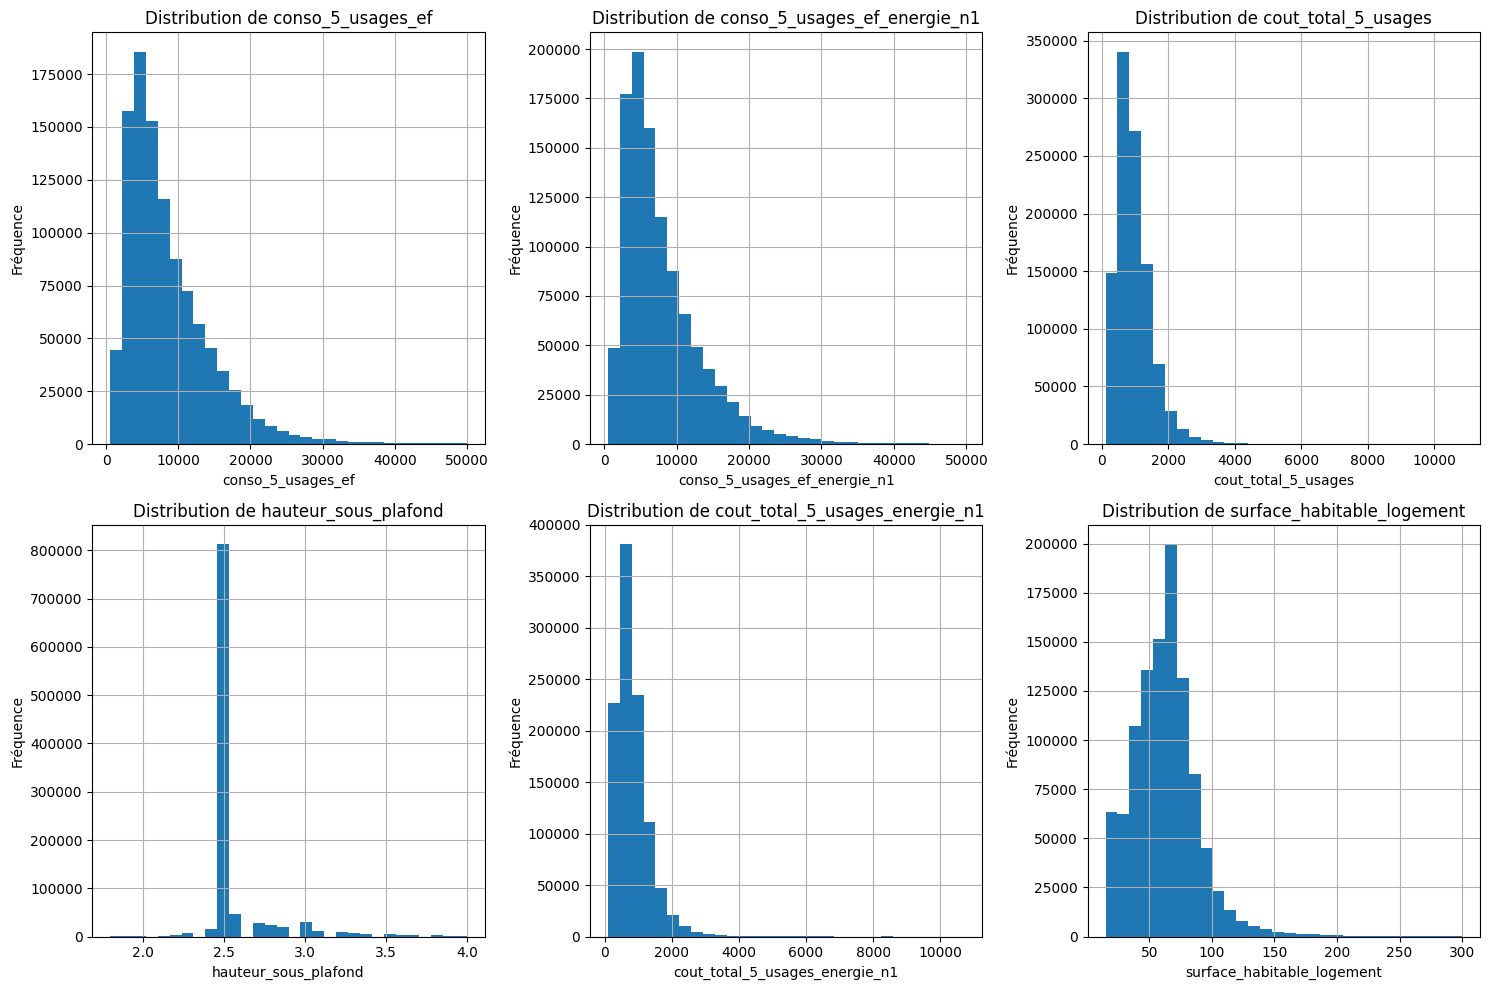

In [295]:
# Statistiques descriptives
print("Statistiques des variables quantitatives:")
print(df_Variables[variables_quantitatives].describe())

# Visualisation des distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(variables_quantitatives[:6]):  # Premières 6 variables
    df_Variables[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

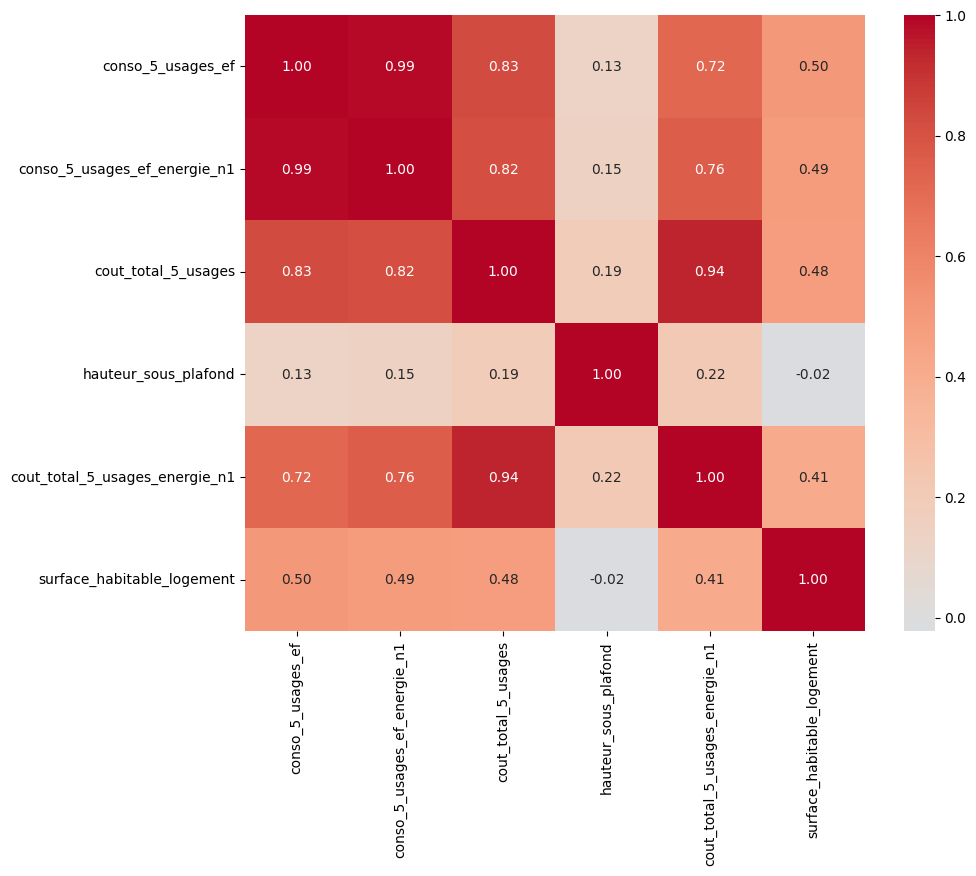

In [302]:
corr = df_Variables[variables_quantitatives].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.show()

In [303]:
df_Variables.to_csv('donnees_ml_preparees.csv', index=False)